In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from scipy.io import wavfile

 Ejercicio 1 - Generación de señales 
 ---------------

Generaremos muestras a partir de la siguiente señal continua

\begin{equation}
    \label{x}
    x(t) = \sin(2\pi f_0 t) + \cos(2\pi f_1 t)
\end{equation}



donde  $f_0 = 2$Hz y $f_1 = 3f_0$.

**1.1** Implemente una función  def $x(t)$   que devuelve los valores de $x(t)$ de una lista de valores en formato numpy.

In [2]:
f0 = 2
f1 = 3*f0

def x(t):
    return np.sin(2*np.pi*f0*t)+np.cos(2*np.pi*f1*t)

**1.2** Genere una señal con un muestreo fino a una frecuencia de muestreo $f_{s0} = 1000$Hz sobre $N_0 = 1024$ muestras:

- Genere un arreglo $t_0$ de $N$ muestras temporales de valores $t = \frac{n}{f_{s0}}$.
        
- Evalue la función $x$ en el vector de tiempo $t_0$ y almacene los valores resultantes $x [n]$ en un vector $x_0$.
        
- Trace la señal con el eje de tiempo correcto en segundos.

Text(0.5, 0, 't0 [s]')

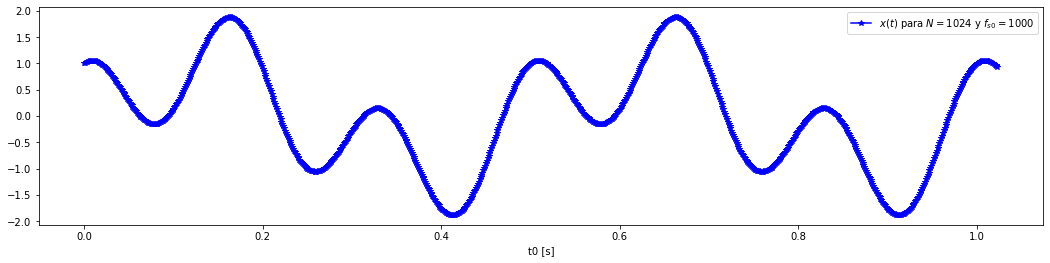

In [3]:
N0 = 2**10  # 1024
fs0 = 1000

step = 1./fs0
init = 0
end = step*N0
t0 = np.arange(init, end, step)

x0 = x(t0)

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(t0, x0, 'b-*',  label='$x(t)$ para $N=1024$ y $f_{s0}=1000$')
ax.legend()
ax.set_xlabel('t0 [s]')

**1.3** Genere una señal  $x_n$ con una frecuencia de muestreo $f_s = 20$ sobre $N = f_s$ muestras (muestreo de 1 segundo).

(20,)


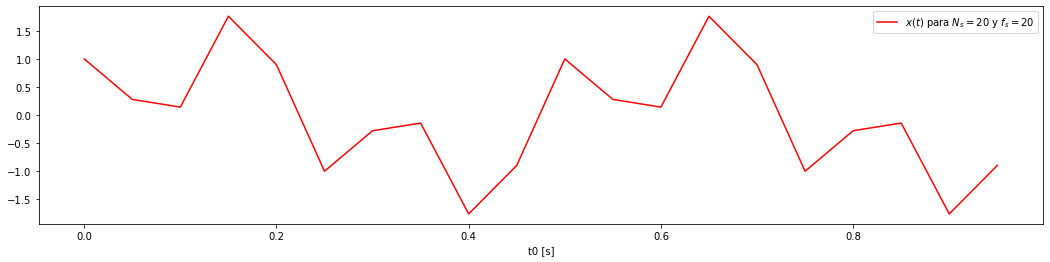

In [4]:
fs = 20
Ns = fs

step = 1./fs
init = 0
end = step * Ns
tn = np.arange(init, end, step)


xn = x(tn)

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(tn, xn, 'r-',  label='$x(t)$ para $N_{s}=20$ y $f_{s}=20$')
ax.legend()
ax.set_xlabel('t0 [s]')
print(xn.shape)

**1.4** Grafique simultáneamente $x_0$ y $x_n$. Para $x_n$, use el estilo de trazado ``-o'' para ver la posición de las muestras.

Text(0.5, 0, 't0 [s]')

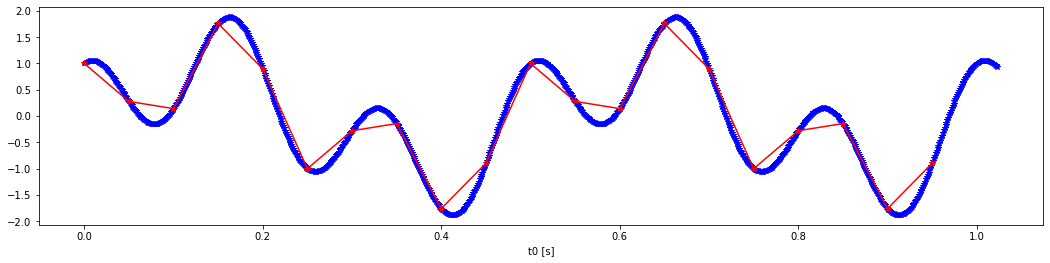

In [5]:
fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(t0, x0, 'b-*',  label='$x(t)$ para $N=1024$ y $f_{s0}=1000$')
ax.plot(tn, xn, 'r-*',  label='$x(t)$ para $N=20$ y $f_{s}=20$')
ax.set_xlabel('t0 [s]')

 Ejercicio 3 - Generacion de señales de audio
 ---------------

1. En esta parte trabajaremos con secuencias de audio.
2. Para hacer eso usaremos *librosa* para cargar y guardar archivos en formato .wav. 
3. También es posible escuchar audio directamente en Python usando la libreria de manipulacion audio *sounddevice* que se puede instalar con pip o conda.

*Nota: cuando se trabaja en un ambiente virtual o en un subsistema como WSL (Windows Subsystem Linux) es mas complicado, pero no imposible, escuchar audio directamente desde una consola Python o un notebook Jupyter, pues se requiere crear un servidor audio para que el sistema hosted pueda acceder a la tarjeta de sonido del sistema host.* 

En esta seccion las señales generadas solo seran escuchadas y trazadas, pero estudiaremos sus componentes de frecuencia en el siguiente TP.

**3.1** Genere 1 segundo de una onda sinusoidal de magnitud $0.5$ y de frecuencia $f_0 = 425$Hz muestreada a
$fs = 8000$Hz. Guardelo como un archivo *.wav* y escuche el archivo o escuche directamente la señal desde
python. Este es el tono de marcado de los teléfonos europeos.

In [6]:
def nota(a, f, t):
    return a*np.sin(2*np.pi*f*t)


tw = np.arange(0, 1, 1./8000)
aw = 0.5
fw = 440

la440 = nota(a=aw, f=fw, t=tw)


io.wavfile.write(filename='la440.wav', rate=8000, data=la440)

fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(tw[:1000], la440[:1000], 'b-',  label='la 440')
ax.set_xlabel('t0 [s]')
ax.set_ylabel('amplitud')

NameError: name 'io' is not defined

**3.2** Es posible generar notas musicales a partir de su numero MIDI m donde la frecuencia se expresa como

$$f_m = 440 · 2^{\frac{m-69}{12}}$$.

Vemos que hay $12$ semitonos para pasar de una nota a su octava.

La nota MIDI $m = 69$ es la LA 4 en notacion europea y es el estandar de tono utilizado para afinar instrumentos para conciertos.


Implemente una funcion *def getNote (m, fs, l)* que devuelve la nota $m$ tocada durante $l$ segundos a la frecuencia $f_s$.

In [ ]:
def getNote (m, fs, l):
    t = np.arange(0, l, 1./fs)
    f = 440 * 2^(np.int32((m-69)/12))
    return nota(a=.5, f=f, t=t)

wavfile.write(filename='*A4_16kHz.wav', rate=8000, data=getNote(m=69, fs=16000, l=2))
wavfile.write(filename='*A8_8kHz.wav', rate=8000, data=getNote(m=117, fs=8000, l=2))
